## Load data

In [147]:
import numpy as np
from src.processing.preprocessing import subsample, fk_transform

In [150]:
data_p = np.load("/home/khatamm/AridMCSlopes/data/X_zero_devito.npz")['rec1']
data_v = np.load("/home/khatamm/AridMCSlopes/data/X_zero_devito.npz")['rec2']

In [151]:
nfft_t, nfft_x = 2**11, 2**9
dx = 6.25
dt = 0.560400009155273

x = np.arange(0,10001,dx)
t = np.arange(0,3751,dt)

nx = data_p.shape[1]
nt = data_p.shape[0]

D, f, ks = fk_transform(data_p, nfft_x, nfft_t, dx, dt)

In [154]:
f[nfft_t//2 -1]

891.3485199669183

In [138]:
data_p.shape

(6693, 1601)

(150.0, 0.0)

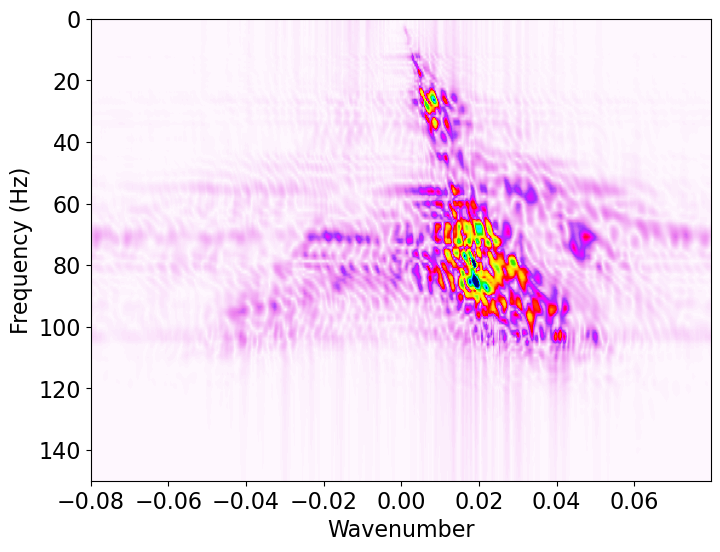

In [156]:
import matplotlib.pyplot as plt

plt.imshow(np.abs(np.fft.fftshift(D)).T[nfft_t//2:], cmap='gist_ncar_r',aspect='auto',vmin=0,vmax=0.01, 
           extent=(np.fft.fftshift(ks)[0], np.fft.fftshift(ks)[-1], f[nfft_t//2-1], f[0]))
# plt.xlim(-1/(2*dx), 1/(2*dx))
plt.xlabel("Wavenumber")
plt.ylabel("Frequency (Hz)")
plt.ylim(150,0)

# Decimating Data

In [223]:
nsub = 5
data_obs,_,Rop = subsample(data_p.T, nsub)

In [224]:
data_obs = data_obs.T
data_obs_plot = (Rop.H @ data_obs.T.ravel()).reshape(nx, nt)

In [220]:
D_sub,_,_ = fk_transform(data_obs, nfft_x, nfft_t, dx*nsub, dt)

/home/khatamm/anaconda3/envs/arid-mcslopes/lib/python3.10/site-packages/pylops/signalprocessing/_baseffts.py:219: UserWarning: nffts in directions [1] have been selected to be smaller than the size of the original signal. This is rarely intended behavior as the original signal will be truncated prior to applying fft, if this is the required behaviour ignore this message.
  warnings.warn(


(150.0, 0.0)

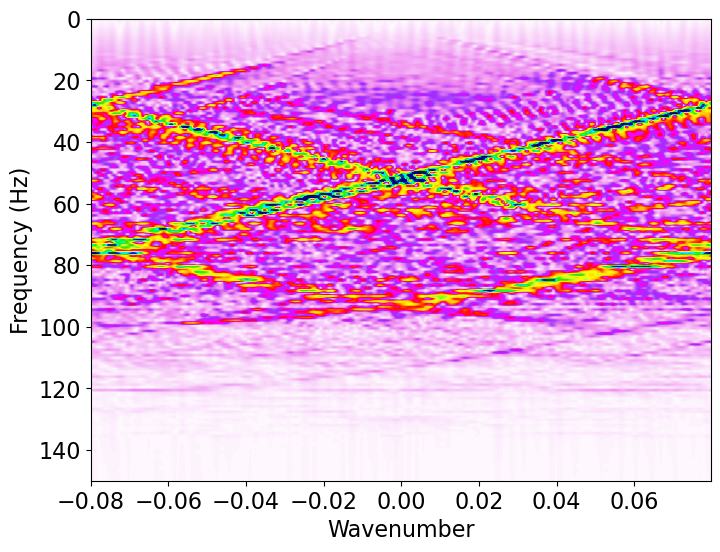

In [221]:
plt.imshow(np.abs(np.fft.fftshift(D_sub)).T[nfft_t//2:], cmap='gist_ncar_r',aspect='auto',vmin=0,vmax=0.1,
           extent=(np.fft.fftshift(ks)[0], np.fft.fftshift(ks)[-1], f[nfft_t//2-1], f[0]))
# plt.xlim(-1/(2*dx), 1/(2*dx))
plt.xlabel("Wavenumber")
plt.ylabel("Frequency (Hz)")
plt.ylim(150,0)

# Comparison Plotting

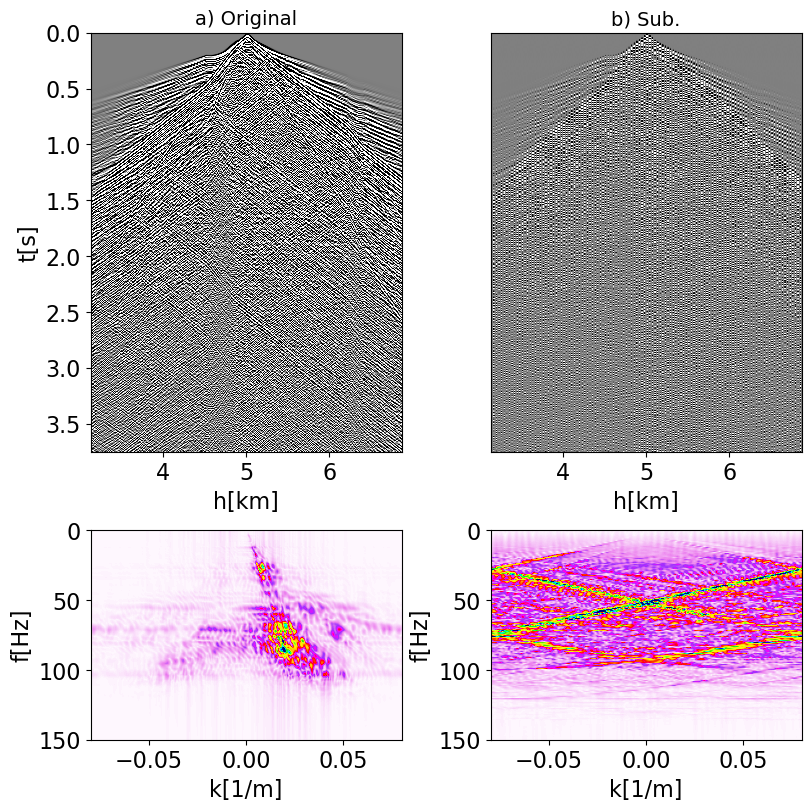

In [222]:
fig = plt.figure(constrained_layout=True, figsize=(8, 8))
axs = []
gs = fig.add_gridspec(3, 2)
axs.append(fig.add_subplot(gs[:2, 0]))
axs.append(fig.add_subplot(gs[:2, 1]))

axs.append(fig.add_subplot(gs[2:, 0]))
axs.append(fig.add_subplot(gs[2:, 1]))

clip_v = 1e-3

axs[0].imshow(data_p[:,500:1100], cmap='gray', aspect='auto', vmin=-clip_v, vmax=clip_v, 
              extent=(x[500]/1000, x[1100]/1000, t[-1]/1000, t[0]/1000))
axs[0].set_title('a) Original', fontsize=14)
axs[0].axis('tight')
axs[0].set_xlabel('h[km]')
axs[0].set_ylabel('t[s]')

axs[1].imshow(data_obs_plot.T[:,500:1100], cmap='gray', aspect='auto', vmin=-clip_v, vmax=clip_v, 
              extent=(x[500]/1000, x[1100]/1000, t[-1]/1000, t[0]/1000))
axs[1].set_title('b) Sub.', fontsize=14)
axs[1].axis('tight')
axs[1].set_xlabel('h[km]')
axs[1].set_yticks([], [])

axs[2].imshow(np.abs(np.fft.fftshift(D)).T[nfft_t//2:], cmap='gist_ncar_r',aspect='auto', vmin=0, vmax=0.01,
                extent=(np.fft.fftshift(ks)[0], np.fft.fftshift(ks)[-1], f[nfft_t//2-1], f[0]))
axs[2].set_xlim(-1/(2*dx), 1/(2*dx));
axs[2].set_ylim(150, 0)
axs[2].set_ylabel('f[Hz]')
axs[2].set_xlabel('k[1/m]')

axs[3].imshow(np.abs(np.fft.fftshift(D_sub)).T[nfft_t//2:], cmap='gist_ncar_r',aspect='auto', vmin=0, vmax=0.1,
                extent=(np.fft.fftshift(ks)[0], np.fft.fftshift(ks)[-1], f[nfft_t//2-1], f[0]))
axs[3].set_xlim(-1/(2*dx), 1/(2*dx));
axs[3].set_ylim(150, 0)
axs[3].set_ylabel('f[Hz]')
axs[3].set_xlabel('k[1/m]')

plt.show()